In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Load Dataset

In [43]:
df = pd.read_csv("final_data/cleaned_dataset.csv") 
df.head()

,review_id,user_id,user_name,time,rating,review,gmap_id,business_name,latitude,longitude,business_desc,avg_rating,num_of_reviews,label
0,1,1.100000e+20,Michelle Banks,2018-03-02 14:13:20,5.0,It's a beautiful place to read books and have ...,0x80c8bf81f68a634f:0xe605b4c3043783c9,Barnes & Noble,36.157754,-115.289418,"['Book store', 'Cafe', 'Childrens book store',...",4.6,1719,relevant
1,2,1.060000e+20,Steven DeRyck [Staff],2018-10-20 01:46:40,4.0,"As previous reviews have stated, two small pie...",0x80c8c415f0a42c77:0x55c554fdc4ad8b9c,Carnegie Deli,36.120556,-115.173611,"['Deli', 'Takeout Restaurant', 'Sandwich shop']",4.1,706,relevant
2,3,1.100000e+20,Stevey Markovich,2020-09-13 12:26:40,5.0,Absolutely love this office! Afton is truly am...,0x80c8ce0f7732ee7b:0xea13348742f64327,Center for Cosmetic and Family Dentistry,36.001929,-115.107484,['Dentist'],4.9,318,relevant
3,4,1.020000e+20,William Campbell,2018-10-20 01:46:40,3.0,The food is as good as it usually is,0x80c8dc9da25847c7:0x27b862b824ac757c,Asian Garden,36.168901,-115.060601,"['Restaurant', 'Asian restaurant', 'Chinese re...",3.8,128,relevant
4,5,1.120000e+20,Beverly Thorman,2018-03-02 14:13:20,5.0,We came in without an appointment on a Saturda...,0x80c8c03de37488fd:0xdc3302fd9f8f44a,Great Clips,36.191055,-115.258969,"['Hair salon', 'Beauty salon']",4.3,168,relevant


# Check Distribution of Numerical Columns

### Identify Columns that are Numerical & Categorical

In [44]:
numerical_col = ['avg_rating', 'num_of_reviews']
categorical_col = ['rating', 'label']

### Histogram for Continuous Variables

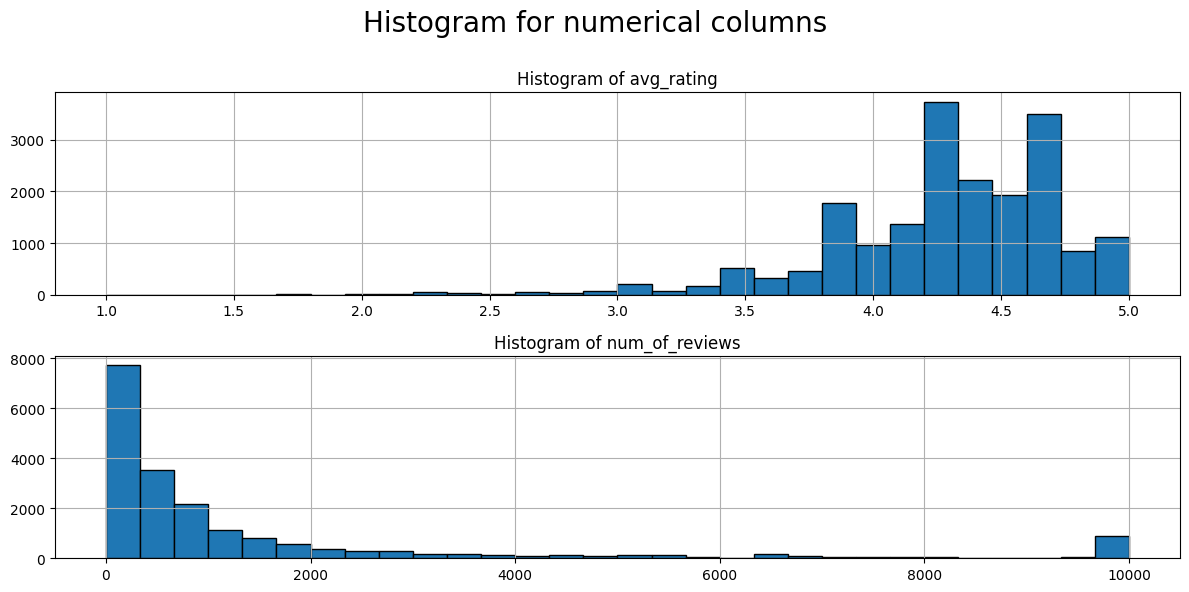

In [45]:
num_cols = df[numerical_col]

plt.figure(figsize=(12, len(num_cols.columns) * 3))

for i, col in enumerate(num_cols.columns, 1):
    plt.subplot(len(num_cols.columns), 1, i)  
    df[col].hist(bins=30, edgecolor='black')  
    plt.title(f'Histogram of {col}')  

plt.suptitle("Histogram for numerical columns", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

### Boxplots for Numerical

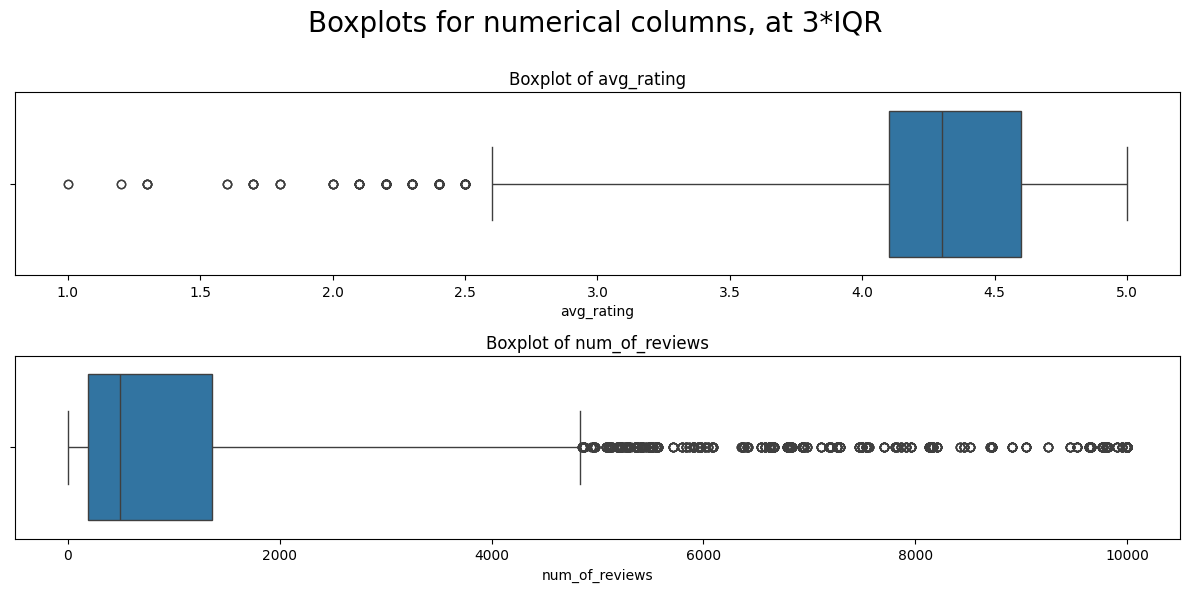

In [46]:
plt.figure(figsize=(12, len(num_cols.columns) * 3))

for i, col in enumerate(num_cols.columns, 1):
    plt.subplot(len(num_cols.columns), 1, i)  
    sns.boxplot(x=num_cols[col], whis=3)  
    plt.title(f'Boxplot of {col}')  

plt.suptitle("Boxplots for numerical columns, at 3*IQR", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

As seen from the visualizations, there are data points that lie outside the 3*IQR.

Although these data points could be considered "outliers", these "outliers" are likely due to the inherent characteristics of the business.

As such, we are not going to handle these outliers, as they reflect genuine data points that are important for understanding the different impacts on the different scales of business.

### Barplots for Categorical Variables

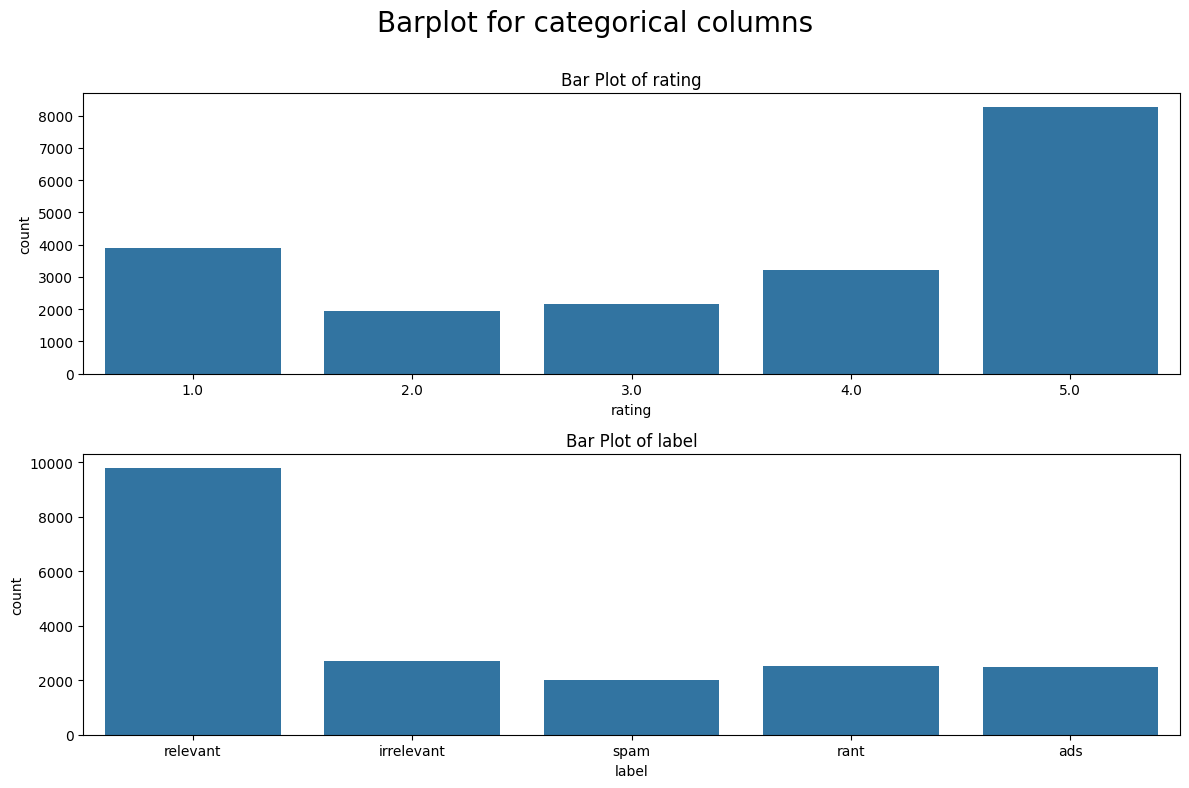

In [47]:
plt.figure(figsize=(12, len(categorical_col) * 4))

for i, col in enumerate(categorical_col, 1):
    plt.subplot(len(categorical_col), 1, i) 
    sns.countplot(data=df, x=col)  
    plt.title(f'Bar Plot of {col}')

plt.suptitle("Barplot for categorical columns", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

As seen from the bar plot of `label`, most of the reviews (XX%) are labeled as relevant.

This is likely because:
- Many reviews available from Google Reviews have already passed through their internal filtering system, removing most of the ads/spam/rant/irrelevant content. <br><br>
- A large portion of businesses tend to receive standard, legitimate feedback, which naturally skews the distribution toward relevant reviews.

**As such, during model development, we will need to perform oversampling on the other labels to ensure that the model is not biased toward the dominant class and can effectively learn to identify less frequent labels.**

# Word Cloud of Reviews

We will create a word cloud of reviews to observe the most common words that are used in reviews.

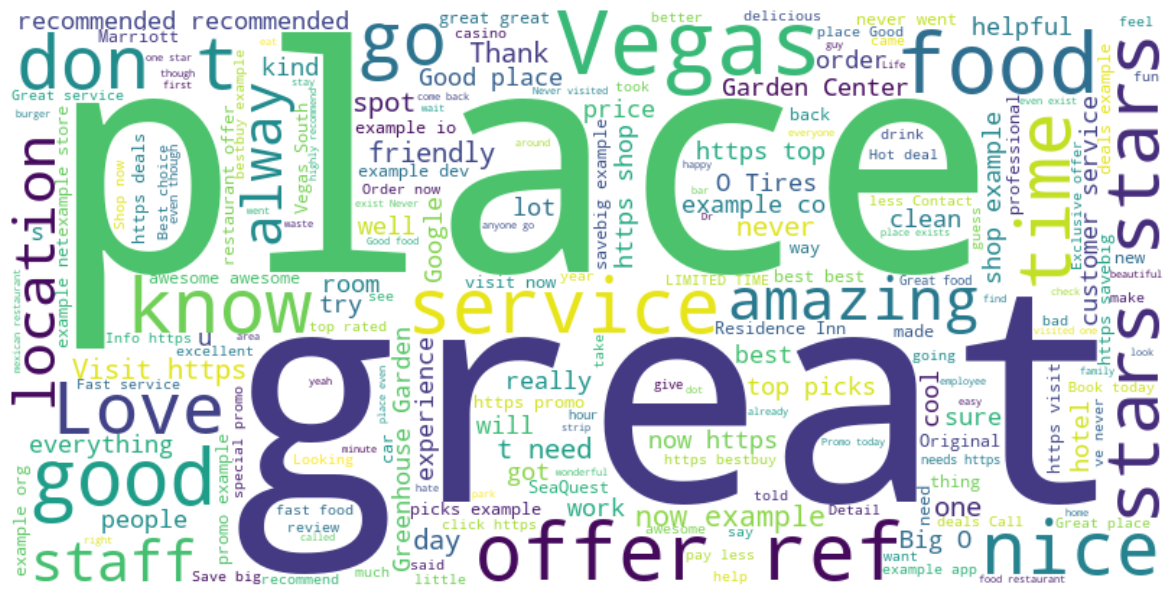

In [49]:
text = " ".join(df['review'].dropna())  

stopwords = set(STOPWORDS)
stopwords.update(["Translated", "Las", "Vega"])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords
).generate(text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

As seen from the word cloud, the most commonly used words in reviews are: 'great', 'good', 'food', 'place', 'service', 'time'. 

These words indicate that customers frequently comment on the overall quality, service experience, highlighting the aspects that are most important to reviewers in this dataset.